# Project Cafe Reward Offer
> Data Source: [Maven Cafe Rewards Offer](https://mavenanalytics.io/data-playground?order=date_added%2Cdesc&search=Cafe%20rewards%20offer)

## Load Data

In [1]:
# Melakukan load data

import pandas as pd

df_cs = pd.read_csv('customers.csv')
df_events = pd.read_csv('events.csv')
df_offers = pd.read_csv('offers.csv')

In [2]:
# Memeriksa struktur data

for df in [df_cs, df_events, df_offers]:
    print(df.info())
    print('='*50)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       17000 non-null  object 
 1   became_member_on  17000 non-null  int64  
 2   gender            14825 non-null  object 
 3   age               17000 non-null  int64  
 4   income            14825 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 664.2+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306534 entries, 0 to 306533
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   customer_id  306534 non-null  object
 1   event        306534 non-null  object
 2   value        306534 non-null  object
 3   time         306534 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 9.4+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data col

In [3]:
# Memeriksa duplikasi data
print(df_cs.duplicated().sum())
print(df_events.duplicated().sum())
print(df_offers.duplicated().sum())

0
397
0


**Temuan**
* Terdapat missing values pada kolom gender dan income (df_cs)
* Terdapat duplikat data pada df_events

## Menangani duplikasi data

In [4]:
# Menampilkan data duplikat

filter_duplicated = df_events.duplicated(keep=False)
df_events.loc[filter_duplicated, :].sort_values(by=list(df_events.columns))

,customer_id,event,value,time
218058,00d7c95f793a4212af44e632fdc1e431,offer completed,{'offer_id': '2906b810c7d4411798c6938adc9daaa5...,504
218060,00d7c95f793a4212af44e632fdc1e431,offer completed,{'offer_id': '2906b810c7d4411798c6938adc9daaa5...,504
220133,01925607d99c460996c281f17cdbb9e2,offer completed,{'offer_id': '4d5c57ea9a6940dd891ad53e9dbe8da0...,510
220134,01925607d99c460996c281f17cdbb9e2,offer completed,{'offer_id': '4d5c57ea9a6940dd891ad53e9dbe8da0...,510
171646,01956670cf414b309675aa73368b94a9,offer completed,{'offer_id': '2906b810c7d4411798c6938adc9daaa5...,420
...,...,...,...,...
274288,ff6a080134fc44dc9c7e7b5abcfbe849,offer completed,{'offer_id': 'ae264e3637204a6fb9bb56bc8210ddfd...,600
228665,ff80a43ecb34439491bd9ae1cff7c5fc,offer completed,{'offer_id': 'fafdcd668e3743c1bb461111dcafc2a4...,528
228666,ff80a43ecb34439491bd9ae1cff7c5fc,offer completed,{'offer_id': 'fafdcd668e3743c1bb461111dcafc2a4...,528
140993,ff95e0a9cdfd4030958762dadcb11e1a,offer completed,{'offer_id': '0b1e1539f2cc45b7b9fa7c272da2e1d7...,372


In [5]:
# Menghapus data duplikat selain data pertama

df_events = df_events.drop_duplicates(keep='first')
df_events.duplicated().sum()

0

## Handling Missing Values

In [6]:
# Mengisi Missing Values kolom 'Gender' pada df_cs dengan 'unknown'

df_cs['gender'] = df_cs['gender'].fillna('not mentioned')   # atau 'O' aja, ya?

In [7]:
df_cs['gender'].unique()

array(['not mentioned', 'F', 'M', 'O'], dtype=object)

In [8]:
df_cs.describe()

,became_member_on,age,income
count,1.700000e+04,17000.000000,14825.000000
mean,2.016703e+07,62.531412,65404.991568
std,1.167750e+04,26.738580,21598.299410
min,2.013073e+07,18.000000,30000.000000
25%,2.016053e+07,45.000000,49000.000000
50%,2.017080e+07,58.000000,64000.000000
75%,2.017123e+07,73.000000,80000.000000
max,2.018073e+07,118.000000,120000.000000


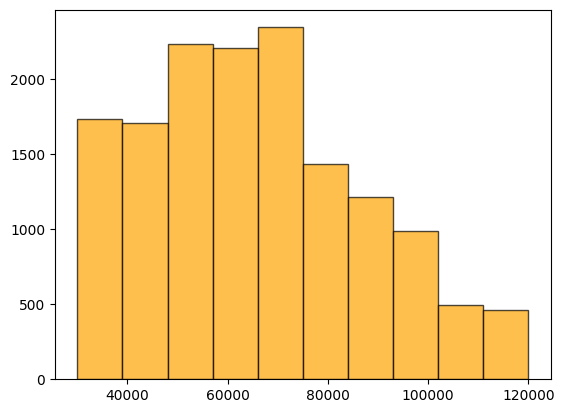

In [9]:
import matplotlib.pyplot as plt

plt.hist(df_cs['income'], color='orange', edgecolor='black', alpha=0.7)
plt.show()

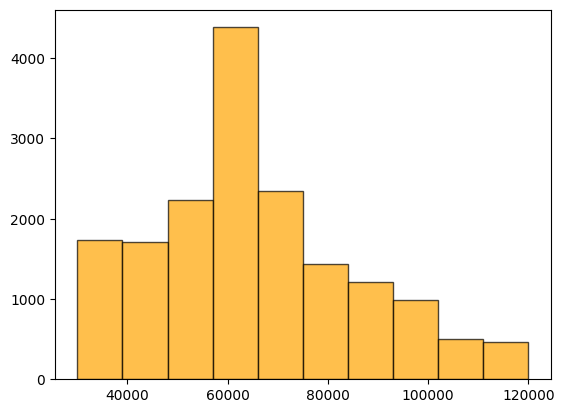

In [10]:
# Mengisi missing value kolom income pada df_cs menggunakan mediannya

df_cs['income'] = df_cs['income'].fillna(df_cs['income'].median())

plt.hist(df_cs['income'], color='orange', edgecolor='black', alpha=0.7)
plt.show()

In [11]:
df_cs.isnull().sum()

,0
customer_id,0
became_member_on,0
gender,0
age,0
income,0


## Data Formatting

In [12]:
df_cs.head()

,customer_id,became_member_on,gender,age,income
0,68be06ca386d4c31939f3a4f0e3dd783,20170212,not mentioned,118,64000.0
1,0610b486422d4921ae7d2bf64640c50b,20170715,F,55,112000.0
2,38fe809add3b4fcf9315a9694bb96ff5,20180712,not mentioned,118,64000.0
3,78afa995795e4d85b5d9ceeca43f5fef,20170509,F,75,100000.0
4,a03223e636434f42ac4c3df47e8bac43,20170804,not mentioned,118,64000.0


In [13]:
df_cs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       17000 non-null  object 
 1   became_member_on  17000 non-null  int64  
 2   gender            17000 non-null  object 
 3   age               17000 non-null  int64  
 4   income            17000 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 664.2+ KB


In [14]:
df_events

,customer_id,event,value,time
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0
4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0
...,...,...,...,...
306529,b3a1272bc9904337b331bf348c3e8c17,transaction,{'amount': 1.5899999999999999},714
306530,68213b08d99a4ae1b0dcb72aebd9aa35,transaction,{'amount': 9.53},714
306531,a00058cf10334a308c68e7631c529907,transaction,{'amount': 3.61},714
306532,76ddbd6576844afe811f1a3c0fbb5bec,transaction,{'amount': 3.5300000000000002},714


In [15]:
df_events['event'].unique()

array(['offer received', 'offer viewed', 'transaction', 'offer completed'],
      dtype=object)

**Temuan**

*df_cs*
1. Kolom 'became_member_on' beripe integer
  * ubah menjadi tipe datetime

*df_events*
1. Kolom `time` berupa hitungan jam
  * Dikonversi ke dalam hitungan hari

2. Terdapat perbedaan format untuk kolom `value` dari setiap jenis event. Perbedaan ini dapat menyulitkan proses analisis.
  * Data `df_events` akan dibagi menjadi tiga dataframe berdasarkan jenis `event`nya: 'transaction', 'offer completed', dan non-transactional ('offer received' dan 'offer viewed').

### Formatting Kolom 'became_member_on'

In [16]:
# Mengonversi kolom 'became_member_on' ke format date
df_cs['became_member_on'] = pd.to_datetime(df_cs['became_member_on'], format='%Y%m%d')
df_cs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customer_id       17000 non-null  object        
 1   became_member_on  17000 non-null  datetime64[ns]
 2   gender            17000 non-null  object        
 3   age               17000 non-null  int64         
 4   income            17000 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 664.2+ KB


### Formatting Kolom 'Time'

In [17]:
import numpy as np

# Mengonversi kolom 'time' menjadi hitungan hari
df_events['day'] = np.floor(df_events['time']// 24).astype(int) + 1

# Menghapus kolom 'time'
df_events.drop(columns = 'time', inplace=True)

df_events.head()

,customer_id,event,value,day
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},1
1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},1
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},1
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},1
4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},1


### Formatting Dataframe Event

In [18]:
# Membuat filter untuk event transaction, offer completed, dan non-transactional
filter_transact = df_events['event'].isin(['transaction'])
filter_offer_comp = df_events['event'].isin(['offer completed'])
filter_non_transact = df_events['event'].isin(['offer received', 'offer viewed'])

# Membuat df baru berdasarkan filter
df_transact = df_events.loc[filter_transact, :]
df_offer_comp = df_events.loc[filter_offer_comp, :]
df_non_transact = df_events.loc[filter_non_transact, :]

#### Formatting Dataframe Transaction

In [19]:
# Melihat format kolom value pada df_transact
df_transact['value'].head()

,value
12654,{'amount': 0.8300000000000001}
12657,{'amount': 34.56}
12659,{'amount': 13.23}
12670,{'amount': 19.51}
12671,{'amount': 18.97}


In [20]:
# Mengubah format kolom value
df_transact['value'] = df_transact['value'].str.replace(r"{'amount': ", "").str.replace(r"}", "")

# Mengubah nama kolom value menjadi amount
df_transact = df_transact.rename(columns={'value': 'amount'})

df_transact.head()

<ipython-input-20-873c4d6a0990>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_transact['value'] = df_transact['value'].str.replace(r"{'amount': ", "").str.replace(r"}", "")


,customer_id,event,amount,day
12654,02c083884c7d45b39cc68e1314fec56c,transaction,0.8300000000000001,1
12657,9fa9ae8f57894cc9a3b8a9bbe0fc1b2f,transaction,34.56,1
12659,54890f68699049c2a04d415abc25e717,transaction,13.23,1
12670,b2f1cd155b864803ad8334cdf13c4bd2,transaction,19.51,1
12671,fe97aa22dd3e48c8b143116a8403dd52,transaction,18.97,1


#### Formatting Dataframe Offer Complete

In [21]:
# Melihat format kolom value pada df_offer_comp
df_offer_comp['value'].head()

,value
12658,{'offer_id': '2906b810c7d4411798c6938adc9daaa5...
12672,{'offer_id': 'fafdcd668e3743c1bb461111dcafc2a4...
12679,{'offer_id': '9b98b8c7a33c4b65b9aebfe6a799e6d9...
12692,{'offer_id': 'ae264e3637204a6fb9bb56bc8210ddfd...
12697,{'offer_id': '4d5c57ea9a6940dd891ad53e9dbe8da0...


In [22]:
# Memisahkan kolom `value` pada df_offer_comp menjadi kolom `offer_id` dan `reward`
df_offer_comp[['offer_id', 'reward']] = df_offer_comp['value'].str.split(',', expand=True)

# Menghapus kolom 'value'
df_offer_comp.drop(columns = 'value', inplace=True)

df_offer_comp.head()

<ipython-input-22-929b0303f47e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_offer_comp[['offer_id', 'reward']] = df_offer_comp['value'].str.split(',', expand=True)
<ipython-input-22-929b0303f47e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_offer_comp[['offer_id', 'reward']] = df_offer_comp['value'].str.split(',', expand=True)
<ipython-input-22-929b0303f47e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: htt

,customer_id,event,day,offer_id,reward
12658,9fa9ae8f57894cc9a3b8a9bbe0fc1b2f,offer completed,1,{'offer_id': '2906b810c7d4411798c6938adc9daaa5','reward': 2}
12672,fe97aa22dd3e48c8b143116a8403dd52,offer completed,1,{'offer_id': 'fafdcd668e3743c1bb461111dcafc2a4','reward': 2}
12679,629fc02d56414d91bca360decdfa9288,offer completed,1,{'offer_id': '9b98b8c7a33c4b65b9aebfe6a799e6d9','reward': 5}
12692,676506bad68e4161b9bbaffeb039626b,offer completed,1,{'offer_id': 'ae264e3637204a6fb9bb56bc8210ddfd','reward': 10}
12697,8f7dd3b2afe14c078eb4f6e6fe4ba97d,offer completed,1,{'offer_id': '4d5c57ea9a6940dd891ad53e9dbe8da0','reward': 10}


In [23]:
# Melakukan formatting isi kolom `offer_id` dan `reward` menggunakan metode `replace`

df_offer_comp['offer_id'] = df_offer_comp['offer_id'].str.replace(r"{'offer_id': '", "").str.replace(r"'", "")
df_offer_comp['reward'] = df_offer_comp['reward'].str.replace(r"'reward': ", "").str.replace(r"}", "").astype(int)  # mengubah tipe data kolom `reward` menjadi int

df_offer_comp.head()

<ipython-input-23-f90abe94e0c3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_offer_comp['offer_id'] = df_offer_comp['offer_id'].str.replace(r"{'offer_id': '", "").str.replace(r"'", "")
<ipython-input-23-f90abe94e0c3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_offer_comp['reward'] = df_offer_comp['reward'].str.replace(r"'reward': ", "").str.replace(r"}", "").astype(int)  # mengubah tipe data kolom `reward` menjadi int


,customer_id,event,day,offer_id,reward
12658,9fa9ae8f57894cc9a3b8a9bbe0fc1b2f,offer completed,1,2906b810c7d4411798c6938adc9daaa5,2
12672,fe97aa22dd3e48c8b143116a8403dd52,offer completed,1,fafdcd668e3743c1bb461111dcafc2a4,2
12679,629fc02d56414d91bca360decdfa9288,offer completed,1,9b98b8c7a33c4b65b9aebfe6a799e6d9,5
12692,676506bad68e4161b9bbaffeb039626b,offer completed,1,ae264e3637204a6fb9bb56bc8210ddfd,10
12697,8f7dd3b2afe14c078eb4f6e6fe4ba97d,offer completed,1,4d5c57ea9a6940dd891ad53e9dbe8da0,10


#### Formatting Dataframe Non-Transactional

In [24]:
# Melihat format kolom value pada df_non_transact
df_non_transact.head()

,customer_id,event,value,day
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},1
1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},1
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},1
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},1
4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},1


In [25]:
df_non_transact['value'] = df_non_transact['value'].str.replace(r"{'offer id': '", "").str.replace(r"'}", "")
df_non_transact = df_non_transact.rename(columns={'value': 'offer_id'})
df_non_transact.head()

<ipython-input-25-2f5664048a19>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_non_transact['value'] = df_non_transact['value'].str.replace(r"{'offer id': '", "").str.replace(r"'}", "")


,customer_id,event,offer_id,day
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,9b98b8c7a33c4b65b9aebfe6a799e6d9,1
1,a03223e636434f42ac4c3df47e8bac43,offer received,0b1e1539f2cc45b7b9fa7c272da2e1d7,1
2,e2127556f4f64592b11af22de27a7932,offer received,2906b810c7d4411798c6938adc9daaa5,1
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,fafdcd668e3743c1bb461111dcafc2a4,1
4,68617ca6246f4fbc85e91a2a49552598,offer received,4d5c57ea9a6940dd891ad53e9dbe8da0,1


In [26]:
# Menggabungkan ketiga df yang telah diformat ke dalam df baru
df_events_rev = pd.concat([df_transact, df_offer_comp, df_non_transact], join='outer').reset_index()

# Mengisi kolom amount event 'offer completed' dengan difficulty dari offer_id
df_events_rev.loc[df_events_rev['event'] == 'offer completed', 'amount'] = df_events_rev.loc[df_events_rev['event'] == 'offer completed', 'offer_id'].map(df_offers.set_index('offer_id')['difficulty'])

# Mengisi data null pada kolom 'amount' dengan 0
df_events_rev['amount'] = df_events_rev['amount'].fillna(0)

# Mengubah tipe data menjadi float
df_events_rev['amount'] = df_events_rev['amount'].astype(float)

df_events_rev[df_events_rev['event'] == 'offer completed'].head()

,index,customer_id,event,amount,day,offer_id,reward
138953,12658,9fa9ae8f57894cc9a3b8a9bbe0fc1b2f,offer completed,10.0,1,2906b810c7d4411798c6938adc9daaa5,2.0
138954,12672,fe97aa22dd3e48c8b143116a8403dd52,offer completed,10.0,1,fafdcd668e3743c1bb461111dcafc2a4,2.0
138955,12679,629fc02d56414d91bca360decdfa9288,offer completed,5.0,1,9b98b8c7a33c4b65b9aebfe6a799e6d9,5.0
138956,12692,676506bad68e4161b9bbaffeb039626b,offer completed,10.0,1,ae264e3637204a6fb9bb56bc8210ddfd,10.0
138957,12697,8f7dd3b2afe14c078eb4f6e6fe4ba97d,offer completed,10.0,1,4d5c57ea9a6940dd891ad53e9dbe8da0,10.0


In [27]:
df_events_rev['amount'].sum().round(2)

2082510.97

## Tren Transaksi per Hari

* Transaksi yang dimaksud adalah pembelian dengan offer (offer completed) dan tanpa melibatkan offer (transaction; disebut transaksi 'regular')


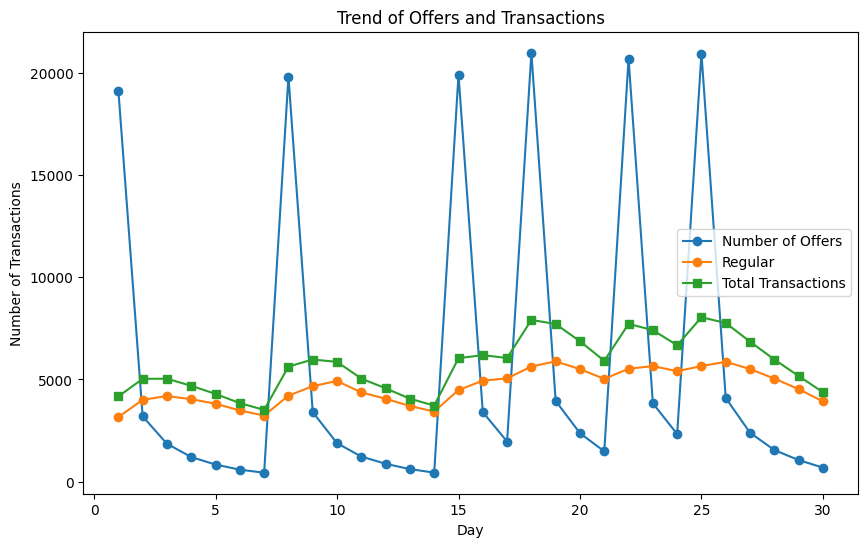

<Figure size 640x480 with 0 Axes>

In [28]:
# Hitung jumlah event per hari
df_grouped = df_events_rev.groupby(['day', 'event']).size().reset_index(name='count')

# Pivot data untuk memisahkan event ke kolom masing-masing
offer_vs_event = df_grouped.pivot(index='day', columns='event', values='count').fillna(0)

# Hitung total jumlah offer dan total transaksi
offer_vs_event['total_offers'] = offer_vs_event.get('offer received', 0) + offer_vs_event.get('offer viewed', 0) + offer_vs_event.get('offer completed', 0)
offer_vs_event['regular'] = offer_vs_event.get('transaction', 0)
offer_vs_event['total_transactions'] = offer_vs_event.get('offer completed', 0) + offer_vs_event.get('transaction', 0)

# Reset index untuk tampilan akhir
offer_vs_event = offer_vs_event.reset_index()

# Plot total offer vs total transaction
plt.figure(figsize=(10, 6))
plt.plot(offer_vs_event['day'], offer_vs_event['total_offers'], label='Number of Offers', marker='o')
plt.plot(offer_vs_event['day'], offer_vs_event['regular'], label='Regular', marker='o')
plt.plot(offer_vs_event['day'], offer_vs_event['total_transactions'], label='Total Transactions', marker='s')
plt.xlabel('Day')
plt.ylabel('Number of Transactions')
plt.title('Trend of Offers and Transactions')
plt.legend()
plt.show()

plt.savefig('trend_offer_transaction.png')

### **Insight**

1. Transaksi reguler merupakan transaksi yang cenderung konsisten selama periode (tidak terpengaruh dengan adanya offer)
2. Ada pengaruh jumlah offer terhadap jumlah penjualan, yaitu kenaikan total penjualan terjadi saat puncak pemberian offer.
  - Kenaikan paling tinggi adalah pada hari ke-8, yaitu sekitar **60,38%** dibanding hari sebelumnya
  - Total penjualan tertinggi terjadi di akhir periode offer, yaitu hari ke-8 dengan total penjualan **8.045** penjualan.
3. Peningkatan frekuensi offer dapat meningkatkan jumlah penjualan
  - Pada periode offer hari ke-15 sampai 25, total penjualan relatif lebih tinggi dibanding periode offer lainnya

## Q1: Berapa banyak offer yang diselesaikan (offer completed)? Offer tipe mana yang memiliki tingkat penyelesaian (completion rate) yang paling tinggi?

> Note: Event **transactional** adalah pembelian yang tidak melibatkan atau tidak berhubungan dengan offer.

* Tingkat penyelesaian (completion rate) dari masing-masing tipe offer (offer type) dihitung dengan cara membagi jumlah event 'offer completed' dari setiap tipe offer dengan total setiap offer yang ditawarkan.

> ${\text {comp rate}_i} \text{(%)} = \frac{\text{jumlah offer completed}_i}{\text{total offer}_i} * 100$

In [29]:
print(f'Terdapat {df_offer_comp.shape[0]} offer yang diselesaikan (offer completed) dari total {df_offer_comp.shape[0] + df_non_transact.shape[0]} offer yang ditawarkan.')
print(f'Atau sekitar {(df_offer_comp.shape[0]/(df_offer_comp.shape[0] + df_non_transact.shape[0])*100)}% offer yang diselesaikan (offer completed).')

Terdapat 33182 offer yang diselesaikan (offer completed) dari total 167184 offer yang ditawarkan.
Atau sekitar 19.847593071107283% offer yang diselesaikan (offer completed).


In [30]:
# Mengecek tipe offer yang ditawarkan
df_offers['offer_type'].unique()

array(['bogo', 'informational', 'discount'], dtype=object)

In [31]:
# Menambahkan kolom offer_type yang diperoleh dari df_offers
df_events_rev = df_events_rev.merge(df_offers[['offer_id', 'offer_type']], on='offer_id', how='left')

df_events_rev.tail()

,index,customer_id,event,amount,day,offer_id,reward,offer_type
306132,306441,d56386cf344c4829bbf420d1895dca37,offer viewed,0.0,30,5a8bc65990b245e5a138643cd4eb9837,NaN,informational
306133,306450,9b51e8797290403b90d09d864dec4b94,offer viewed,0.0,30,3f207df678b143eea3cee63160fa8bed,NaN,informational
306134,306483,84fb57a7fe8045a8bf6236738ee73a0f,offer viewed,0.0,30,5a8bc65990b245e5a138643cd4eb9837,NaN,informational
306135,306490,abc4359eb34e4e2ca2349da2ddf771b6,offer viewed,0.0,30,3f207df678b143eea3cee63160fa8bed,NaN,informational
306136,306507,8dda575c2a1d44b9ac8e8b07b93d1f8e,offer viewed,0.0,30,0b1e1539f2cc45b7b9fa7c272da2e1d7,NaN,discount


In [32]:
df_events_rev.to_csv('df_events_rev.csv')

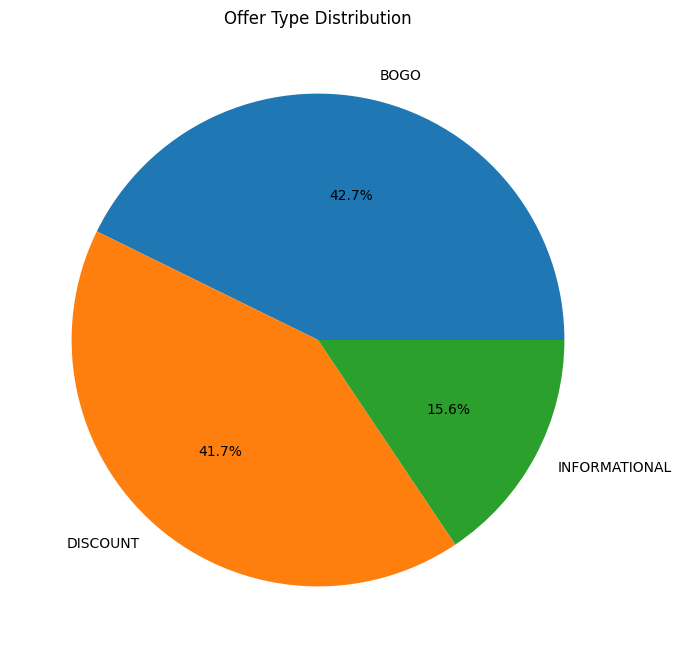

In [33]:
# Melihat sebaran tipe offer
data = [
    df_events_rev[df_events_rev['offer_type'] == 'bogo'].shape[0],
    df_events_rev[df_events_rev['offer_type'] == 'discount'].shape[0],
    df_events_rev[df_events_rev['offer_type'] == 'informational'].shape[0]
]

labels = ['BOGO', 'DISCOUNT', 'INFORMATIONAL']

# Membuat pie chart
plt.figure(figsize=(8, 8))
plt.pie(data, labels=labels, autopct='%1.1f%%')
plt.title('Offer Type Distribution')
plt.show()

In [34]:
# Menghitung jumlah per tipe offer dan event
type_count = (
    df_events_rev.loc[df_events_rev['event'].isin(['offer received', 'offer viewed', 'offer completed']), :]
    .groupby(['offer_type', 'event'])
    .size()
    .reset_index(name='count')
    .assign(
        # Menghitung jumlah setiap tipe offer
        total_per_type = lambda x: x.groupby('offer_type')['count'].transform('sum'),
        # Menghitung persentase tipe offer untuk setiap event
        persen_type = lambda x: x['count'] / x['total_per_type'] * 100
    )
)

# Membuat pivot table untuk persentase berdasarkan masing-masing tipe offer
pd.pivot_table(type_count, index='offer_type', columns='event', values='persen_type', fill_value=0).round(2)

event,offer completed,offer received,offer viewed
offer_type,,,
bogo,21.70,42.69,35.62
discount,25.38,43.84,30.78
informational,0.00,58.45,41.55


### **Insight**
 1. Persentase penyelesaian offer oleh customer adalah 19.85% terhadap keseluruhan offer yang ditawarkan dan 36,5% terhadap offer yang potensial (telah dilihat).
 2. Tipe offer **discount** memiliki persentase penyelesaian paling tinggi. Namun, tingkat penyelesaian offer ini masih cukup kecil dibandingkan jumlah offer yang ditawarkan.

### Detail Performa Jenis Offer

In [35]:
# Membuat kolom alias untuk offer_id

df_offers['as_offer'] = df_offers.groupby('offer_type').cumcount() + 1
df_offers['as_offer'] = df_offers['offer_type'] + df_offers['as_offer'].astype(str)

df_offers

,offer_id,offer_type,difficulty,reward,duration,channels,as_offer
0,ae264e3637204a6fb9bb56bc8210ddfd,bogo,10,10,7,"['email', 'mobile', 'social']",bogo1
1,4d5c57ea9a6940dd891ad53e9dbe8da0,bogo,10,10,5,"['web', 'email', 'mobile', 'social']",bogo2
2,3f207df678b143eea3cee63160fa8bed,informational,0,0,4,"['web', 'email', 'mobile']",informational1
3,9b98b8c7a33c4b65b9aebfe6a799e6d9,bogo,5,5,7,"['web', 'email', 'mobile']",bogo3
4,0b1e1539f2cc45b7b9fa7c272da2e1d7,discount,20,5,10,"['web', 'email']",discount1
5,2298d6c36e964ae4a3e7e9706d1fb8c2,discount,7,3,7,"['web', 'email', 'mobile', 'social']",discount2
6,fafdcd668e3743c1bb461111dcafc2a4,discount,10,2,10,"['web', 'email', 'mobile', 'social']",discount3
7,5a8bc65990b245e5a138643cd4eb9837,informational,0,0,3,"['email', 'mobile', 'social']",informational2
8,f19421c1d4aa40978ebb69ca19b0e20d,bogo,5,5,5,"['web', 'email', 'mobile', 'social']",bogo4
9,2906b810c7d4411798c6938adc9daaa5,discount,10,2,7,"['web', 'email', 'mobile']",discount4


In [36]:
# Membuat df baru untuk menyeleksi event selain transaction
df_semua_offer = df_events_rev.loc[df_events_rev['event'].isin(['offer received', 'offer viewed', 'offer completed']), ['index', 'event', 'offer_id', 'offer_type']]
# Menambahkan kolom 'as_offer' ke dalam df_semua_offer
df_semua_offer = df_semua_offer.merge(df_offers[['offer_id', 'as_offer']], on='offer_id', how='left')

# Menghitung jumlah per alias offer dan event
as_offer_count = (
    df_semua_offer.groupby(['as_offer', 'event'])
    .size()
    .reset_index(name='count')
    .assign(
        # Menghitung total setiap as_offer
        total_type_offer = lambda x: x.groupby('as_offer')['count'].transform('sum'),
        # Menghitung persen as_offer untuk setiap event
        persen = lambda x: x['count'] / x['total_type_offer'] * 100
    )
)

# Membuat pivot table untuk persentase berdasarkan masing-masing alias offer untuk setiap event
pd.pivot_table(as_offer_count, index='as_offer', columns='event', values='persen', fill_value=0).round(2)

event,offer completed,offer received,offer viewed
as_offer,,,
bogo1,20.18,42.52,37.29
bogo2,18.15,41.74,40.12
bogo3,26.64,47.53,25.83
bogo4,22.32,39.64,38.04
discount1,24.43,56.09,19.48
discount2,25.44,38.05,36.51
discount3,26.08,37.63,36.29
discount4,25.23,48.57,26.21
informational1,0.00,64.76,35.24


In [45]:
# Menghitung tingkat konversi dan penyelesaian
conver_comp_rate = (
    as_offer_count.pivot_table(
        index='as_offer',
        columns='event',
        values='count',
        aggfunc='sum',
        fill_value=0
    )
    .assign(
        # Menghitung tingkat konversi
        conversion_rate=lambda x: (x['offer viewed'] / (x['offer received'] + x['offer viewed']) * 100).round(2),
        # Menghitung tingkat penyelesaian
        completion_rate=lambda x: (x['offer completed'] / (x['offer viewed'] + x['offer completed']) * 100).round(2)
    )
    .reset_index()
)
conver_comp_rate

event,as_offer,offer completed,offer received,offer viewed,conversion_rate,completion_rate
0,bogo1,3635,7658,6716,46.72,35.12
1,bogo2,3301,7593,7298,49.01,31.14
2,bogo3,4303,7677,4171,35.20,50.78
3,bogo4,4262,7571,7264,48.97,36.98
4,discount1,3340,7668,2663,25.78,55.64
5,discount2,5112,7646,7337,48.97,41.06
6,discount3,5265,7597,7327,49.10,41.81
7,discount4,3964,7632,4118,35.05,49.05
8,informational1,0,7617,4144,35.24,0.00
9,informational2,0,7618,6687,46.75,0.00


In [38]:
# Melihat detail setiap offer
df_offers[['as_offer', 'difficulty', 'reward', 'duration', 'channels']].sort_values(by='as_offer', ascending=True)

,as_offer,difficulty,reward,duration,channels
0,bogo1,10,10,7,"['email', 'mobile', 'social']"
1,bogo2,10,10,5,"['web', 'email', 'mobile', 'social']"
3,bogo3,5,5,7,"['web', 'email', 'mobile']"
8,bogo4,5,5,5,"['web', 'email', 'mobile', 'social']"
4,discount1,20,5,10,"['web', 'email']"
5,discount2,7,3,7,"['web', 'email', 'mobile', 'social']"
6,discount3,10,2,10,"['web', 'email', 'mobile', 'social']"
9,discount4,10,2,7,"['web', 'email', 'mobile']"
2,informational1,0,0,4,"['web', 'email', 'mobile']"
7,informational2,0,0,3,"['email', 'mobile', 'social']"


In [39]:
df_cs.to_csv('df_cs.csv')
df_events_rev.to_csv('df_events_rev.csv')
df_offers.to_csv('df_offers.csv')

**Asumsi**
  * Sebuah offer berhenti di tingkat **offer received** karena customer kesulitan menemukan/menjumpai offer yang ditawarkan
  * Sebuah offer berhenti di tingkat **offer viewed** karena customer kurang tertarik dengan offer yang ditawarkan

**Offer BOGO**

* Offer **bogo3** memiliki completion rate yang paling tinggi dibanding tipe offer bogo lainnya. Namun, memiliki jumlah 'offer received' yang tinggi. Hal ini menunjukkan bahwa banyak customer yang **belum menjangkau offer** tersebut meskipun offer tersebut lebih sesuai dengan preferensi customer.
* Offer **bogo2**, meski dipromosikan dengan masif (dibuktikan dengan conversion rate yang tinggi) tetapi memiliki completion rate yang rendah. Ini menunjukkan bahwa offer bogo2 **kurang sesuai dengan preferensi customer**.

> Preferensi customer: difficulty rendah dengan duration yang lebih lama. Besar reward tidak begitu memengaruhi keputusan customer

**Offer Discount**

* **Discount2** dan **discount3** dipromosikan dengan baik dan paling banyak diselesaikan.
* **Discount1** dan **discount4** kurang dipromosikan dengan baik meski penjualannya cukup menjanjikan (completion rate tinggi). Dapat ditingkatkan performanya dengan mempromosikan secara masif

> Promosi yang masif (memaksimalkan penggunaan channel yang ada) meningkatkan conversion dan completion rate. Tidak ditemukan preferensi offer tertentu (baik dari difficulty, duration, maupun reward).

**Informational**

* Conversion rate masih rendah, terutama untuk **informational1**. Dapat ditingkatkan dengan promosi yang lebih masif.

 > Diasumsikan bahwa tipe offer informational adalah offer dengan bentuk ads yang tujuannya untuk dilihat, bukan diselesaikan seperti dua tipe offer lainnya.

 > Channel 'social' memiliki dampak yang lebih dalam meningkatkan viewed rate offer (memperluas jangkauan offer pada customer)

#### **Insight**

1. Untuk meningkatkan keterlibatan atau interaksi customer terhadap offer, dapat dilakukan dengan memanfaatkan channel yang dimiliki cafe semaksimal mungkin untuk menyebarkan informasi.

2. Persentase penyelesaian offer (offer completed) masih jauh lebih kecil dibanding jumlah offer yang diberikan, disebabkan karena beberapa kemungkinan:
  * peluang customer mengakses offer cukup kecil, disebabkan karena jangkauan promosi yang sempit
  * offer yang diberikan kurang sesuai dengan preferensi customer.




#### **Saran**

1. **Untuk Meningkatkan persentase offer viewed (conversion rate)**: perlu ditinjau jalur/channel promosi yang digunakan untuk menyebarkan offer
 * Semakin banyak channel yang digunakan, semakin besar peluang customer membuka offer
 * Penggunaan channel 'social' lebih meningkatkan conversion rate dibanding channel lain

2. **Meningkatkan persentase offer completed (completed rate)**: perlu ditinjau detail offer (difficulty, reward, dsb) untuk menyesuaikan dengan preferensi customer.
  * Untuk tipe offer BOGO, customer memiliki preferensi untuk mengambil offer dengan minimal amount (difficulty) lebih rendah dan duration yang lebih lama.
  * Sementara untuk tipe offer Discount, customer tidak menunjukkan preferensi tertentu.

## Q2: Apakah terdapat pola demografi customer untuk setiap event (interaksi dengan offer)?

In [40]:
# Melihat performa setiap customer
cust_count = (
    df_events_rev.groupby(['customer_id', 'event'])
    .size()
    .reset_index(name='count')
)

# Membuat pivot table untuk jumlah transaksi yang dilakukan customer untuk masing-masing event
event_per_cust = pd.pivot_table(
                                cust_count,
                                index='customer_id',
                                columns='event',
                                values='count',
                                fill_value=0).round(2)

event_per_cust

event,offer completed,offer received,offer viewed,transaction
customer_id,,,,
0009655768c64bdeb2e877511632db8f,3.0,5.0,4.0,8.0
00116118485d4dfda04fdbaba9a87b5c,0.0,2.0,2.0,3.0
0011e0d4e6b944f998e987f904e8c1e5,3.0,5.0,5.0,5.0
0020c2b971eb4e9188eac86d93036a77,3.0,5.0,3.0,8.0
0020ccbbb6d84e358d3414a3ff76cffd,3.0,4.0,4.0,12.0
...,...,...,...,...
fff3ba4757bd42088c044ca26d73817a,3.0,6.0,3.0,11.0
fff7576017104bcc8677a8d63322b5e1,3.0,5.0,4.0,6.0
fff8957ea8b240a6b5e634b6ee8eafcf,0.0,3.0,2.0,5.0


In [41]:
# Menambahkan kolom label interaksi
def label_interaction(row):
    # Label 'only received' untuk customer yang tidak melakukan interaksi (hanya menerima) offer
    if row['offer viewed'] == 0 and row['offer completed'] == 0:
        return 'only received'
    # Label 'only viewed' untuk customer yang pernah berinteraksi dengan offer tanpa menyelesaikan offer
    elif row['offer completed'] == 0 and row['offer viewed'] > 0:
        return 'only viewed'
    # Label 'completed' untuk customer yang pernah menyelesaikan setidaknya satu offer
    else:
        return 'completed'

event_per_cust['interaction_label'] = event_per_cust.apply(label_interaction, axis=1)
event_per_cust

event,offer completed,offer received,offer viewed,transaction,interaction_label
customer_id,,,,,
0009655768c64bdeb2e877511632db8f,3.0,5.0,4.0,8.0,completed
00116118485d4dfda04fdbaba9a87b5c,0.0,2.0,2.0,3.0,only viewed
0011e0d4e6b944f998e987f904e8c1e5,3.0,5.0,5.0,5.0,completed
0020c2b971eb4e9188eac86d93036a77,3.0,5.0,3.0,8.0,completed
0020ccbbb6d84e358d3414a3ff76cffd,3.0,4.0,4.0,12.0,completed
...,...,...,...,...,...
fff3ba4757bd42088c044ca26d73817a,3.0,6.0,3.0,11.0,completed
fff7576017104bcc8677a8d63322b5e1,3.0,5.0,4.0,6.0,completed
fff8957ea8b240a6b5e634b6ee8eafcf,0.0,3.0,2.0,5.0,only viewed


In [42]:
# Menggabungkan data customer dengan data demografi customer
demografi_cust = event_per_cust.merge(df_cs, on='customer_id', how='left')

demografi_cust = demografi_cust.reindex(columns=['customer_id', 'interaction_label', 'became_member_on', 'gender', 'age', 'income']).sort_values('interaction_label')
demografi_cust

,customer_id,interaction_label,became_member_on,gender,age,income
0,0009655768c64bdeb2e877511632db8f,completed,2017-04-21,M,33,72000.0
10549,9d8bdbbb3436461ca2babeed7b0cddf0,completed,2017-08-19,M,31,57000.0
10551,9d8f44ec36614d7c992fa640ae133fc3,completed,2016-07-26,F,53,87000.0
10553,9d972fbd7faf433ebbb70d8ac7200ecb,completed,2014-05-31,M,51,33000.0
10554,9d9762e2f526402aa214e18be86ecb0f,completed,2017-09-23,M,57,104000.0
...,...,...,...,...,...,...
11821,b04a58ee91554c7182df30031c82a7e9,only viewed,2017-10-22,not mentioned,118,64000.0
3906,3aea87f652824e64bf09b040566722bc,only viewed,2018-01-25,F,21,60000.0
3907,3aed39e33d8d432f9286ebea81b38639,only viewed,2016-06-18,F,62,77000.0
11816,b03860a74ca14828b25aef71ae8ac3b0,only viewed,2018-04-25,M,61,53000.0


### Pola Demografi Customer berdasarkan Lama Waktu Menjadi Member

In [47]:
newest_member_date = demografi_cust['became_member_on'].max()
newest_member_date

Timestamp('2018-07-26 00:00:00')

In [50]:
# Mendefinisikan tanggal sebagai patokan perhitungan membership
today_date = newest_member_date # tahun bergabungnya member terbaru
dat = pd.to_datetime(today_date)

# Menghitung lama membership masing-masing customer (hitungan tahun)
demografi_cust['membership_period'] = ((dat - demografi_cust['became_member_on']) / pd.Timedelta(days=365)).astype(int)
demografi_cust.drop(columns='became_member_on', inplace=True)
demografi_cust

,customer_id,interaction_label,gender,age,income,membership_period
0,0009655768c64bdeb2e877511632db8f,completed,M,33,72000.0,1
10549,9d8bdbbb3436461ca2babeed7b0cddf0,completed,M,31,57000.0,0
10551,9d8f44ec36614d7c992fa640ae133fc3,completed,F,53,87000.0,2
10553,9d972fbd7faf433ebbb70d8ac7200ecb,completed,M,51,33000.0,4
10554,9d9762e2f526402aa214e18be86ecb0f,completed,M,57,104000.0,0
...,...,...,...,...,...,...
11821,b04a58ee91554c7182df30031c82a7e9,only viewed,not mentioned,118,64000.0,0
3906,3aea87f652824e64bf09b040566722bc,only viewed,F,21,60000.0,0
3907,3aed39e33d8d432f9286ebea81b38639,only viewed,F,62,77000.0,2
11816,b03860a74ca14828b25aef71ae8ac3b0,only viewed,M,61,53000.0,0


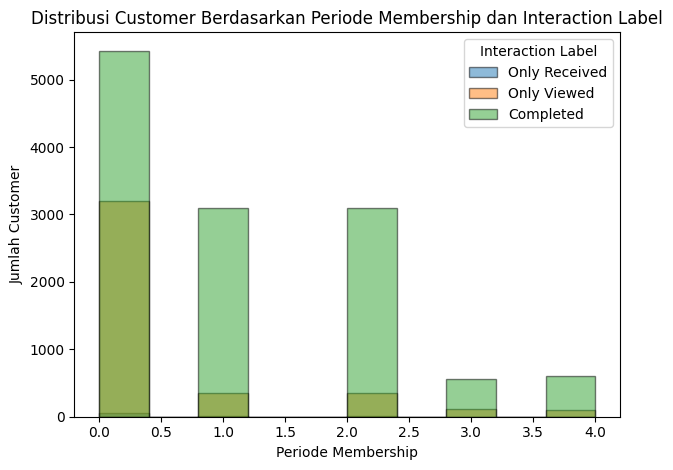

In [51]:
# Mengambil data untuk setiap interaction_label
member_received = demografi_cust[demografi_cust['interaction_label'] == 'only received']['membership_period']
member_viewed = demografi_cust[demografi_cust['interaction_label'] == 'only viewed']['membership_period']
member_completed = demografi_cust[demografi_cust['interaction_label'] == 'completed']['membership_period']

# Plot histogram untuk setiap interaction_label
plt.hist(member_received, alpha=0.5, label='Only Received', edgecolor='black')
plt.hist(member_viewed, alpha=0.5, label='Only Viewed', edgecolor='black')
plt.hist(member_completed, alpha=0.5, label='Completed', edgecolor='black')

# Menambahkan judul dan label
plt.title('Distribusi Customer Berdasarkan Periode Membership dan Interaction Label')
plt.xlabel('Periode Membership')
plt.ylabel('Jumlah Customer')

# Menambahkan legend
plt.legend(title='Interaction Label')

# Menampilkan plot
plt.tight_layout()
plt.show()

* Customer didominasi oleh customer baru (periode membership < 1 tahun)
* Terlepas dari periode membership, sebagian besar customer cenderung pernah menyelesaikan offer (untuk semua kelompok periode membership)
* Tidak ada pola yang kuat terkait periode membership
* Namun, untuk meningkatkan tingkat completion rate, dapat diberikan offer khusus untuk customer baru

### Pola Demografi Customer Berdasarkan Gender

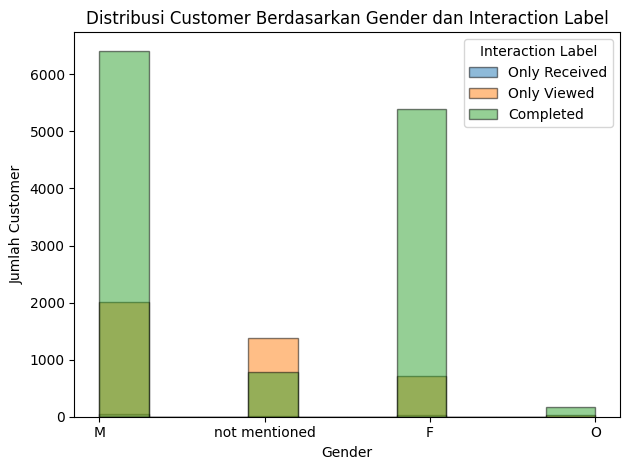

In [52]:
# Mengambil data untuk setiap interaction_label
gender_received = demografi_cust[demografi_cust['interaction_label'] == 'only received']['gender']
gender_viewed = demografi_cust[demografi_cust['interaction_label'] == 'only viewed']['gender']
gender_completed = demografi_cust[demografi_cust['interaction_label'] == 'completed']['gender']

# Plot histogram untuk setiap interaction_label
plt.hist(gender_received, alpha=0.5, label='Only Received', edgecolor='black')
plt.hist(gender_viewed, alpha=0.5, label='Only Viewed', edgecolor='black')
plt.hist(gender_completed, alpha=0.5, label='Completed', edgecolor='black')

# Menambahkan judul dan label
plt.title('Distribusi Customer Berdasarkan Gender dan Interaction Label')
plt.xlabel('Gender')
plt.ylabel('Jumlah Customer')

# Menambahkan legend
plt.legend(title='Interaction Label')

# Menampilkan plot
plt.tight_layout()
plt.show()

* Didominasi oleh customer laki-laki. Namun, tidak ditemukan pola khusus dalam penyelesaian offer (completed rate nya hampir sama).

### Pola Demografi Customer Berdasarkan Usia (Age)

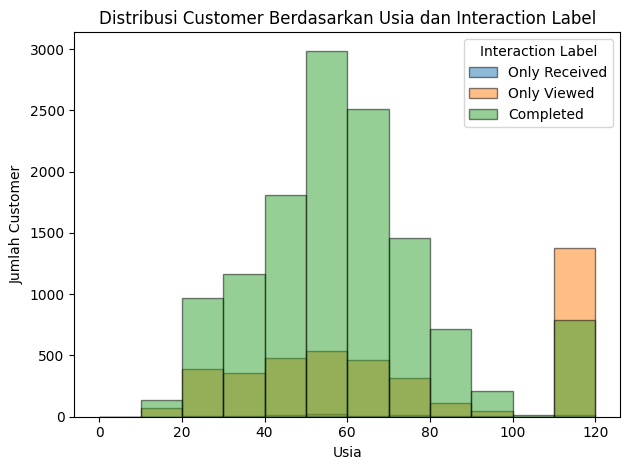

In [53]:
# Menentukan rentang bin usia per 10 tahun
bins = np.arange(0, demografi_cust['age'].max() + 10, 10)

# Mengambil data untuk setiap interaction_label
age_received = demografi_cust[demografi_cust['interaction_label'] == 'only received']['age']
age_viewed = demografi_cust[demografi_cust['interaction_label'] == 'only viewed']['age']
age_completed = demografi_cust[demografi_cust['interaction_label'] == 'completed']['age']

# Plot histogram untuk setiap interaction_label
plt.hist(age_received, bins=bins, alpha=0.5, label='Only Received', edgecolor='black')
plt.hist(age_viewed, bins=bins, alpha=0.5, label='Only Viewed', edgecolor='black')
plt.hist(age_completed, bins=bins, alpha=0.5, label='Completed', edgecolor='black')

# Menambahkan judul dan label
plt.title('Distribusi Customer Berdasarkan Usia dan Interaction Label')
plt.xlabel('Usia')
plt.ylabel('Jumlah Customer')

# Menambahkan legend
plt.legend(title='Interaction Label')

# Menampilkan plot
plt.tight_layout()
plt.show()

#### **Insight**
* Kelompok usia di bawah 100 tahun cenderung pernah menyelesaikan offer
* Sementara kelompok usia di atas 100 tahun lebih cenderung melihat offer saja (kurang tertarik untuk menyelesaikan offer)
* Untuk menjangkau semua kalangan usia, dapat diberikan offer khusus untuk usia senior

### Pola Demografi Customer yang Menyelesaikan Offer Berdasarkan Penghasilan (Income)

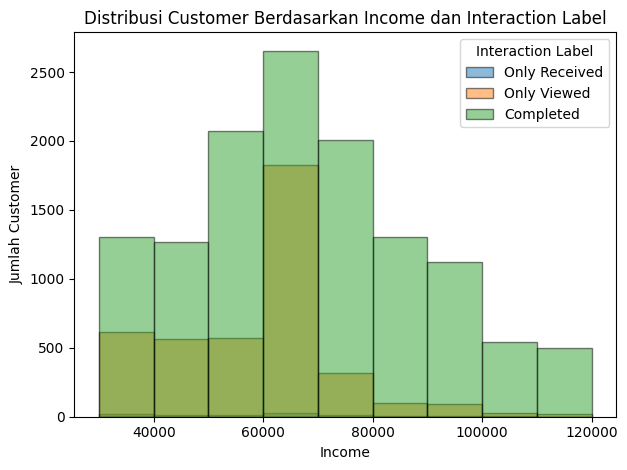

In [54]:
# Menentukan rentang bin usia per 10 tahun
bins = np.arange(demografi_cust['income'].min(), demografi_cust['income'].max() + 10000, 10000)

# Mengambil data untuk setiap interaction_label
inc_received = demografi_cust[demografi_cust['interaction_label'] == 'only received']['income']
inc_viewed = demografi_cust[demografi_cust['interaction_label'] == 'only viewed']['income']
inc_completed = demografi_cust[demografi_cust['interaction_label'] == 'completed']['income']

# Plot histogram untuk setiap interaction_label
plt.hist(inc_received, bins=bins, alpha=0.5, label='Only Received', edgecolor='black')
plt.hist(inc_viewed, bins=bins, alpha=0.5, label='Only Viewed', edgecolor='black')
plt.hist(inc_completed, bins=bins, alpha=0.5, label='Completed', edgecolor='black')

# Menambahkan judul dan label
plt.title('Distribusi Customer Berdasarkan Income dan Interaction Label')
plt.xlabel('Income')
plt.ylabel('Jumlah Customer')

# Menambahkan legend
plt.legend(title='Interaction Label')

# Menampilkan plot
plt.tight_layout()
plt.show()

* Distribusi customer berdasarkan income cukup merata dengan didominasi penghasilan menengah.
* Namun, ada kecenderungan untuk customer yang memiliki income lebih kecil untuk tidak menyelesaikan offer. Untuk meningkatkan completion rate, dapat dilakukan dengan menyesuaikan/menurunkan kategori amount pada offer. Hal ini juga didukung oleh kecenderungan customer untuk mengambil offer BOGO dengan syarat amount lebih kecil.

In [55]:
demografi_cust.to_csv('demografi_cust.csv')

#### **Insight**

Pola Demografi Customer yang Menyelesaikan Offer:
- **Membership**: didominasi oleh customer baru dengan periode membership < 1 tahun. Tidak ada pola yang kuat terkait periode membership.
- **Gender**: Didominasi oleh customer laki-laki. Namun, tidak ditemukan pola khusus dalam penyelesaian offer
- **Age**: Completion rate cukup tinggi untuk semua usia di bawah 100 tahun (didominasi oleh kelompok usia 50-70 tahun). Sementara kelompok usia di 110-120 tahun memiliki conversion rate tinggi dengan completion rate rendah.
- **Income**: ada kecenderungan untuk customer yang memiliki income lebih kecil untuk tidak menyelesaikan offer (completion rate lebih rendah)

#### **Saran**

1. Untuk meningkatkan completion rate dapat diberikan offer khusus untuk kategori customer dengan conversion rate tinggi tetapi completion rate rendah, seperti customer baru, kelompok usia senior.
2. Menurunkan kategori amount pada offer dengan menyesuaikan income customer.